In [16]:
import os
os.environ["USE_PYGEOS"] = "0"  # suppress geopandas warning

In [17]:
import matplotlib.pyplot as plt
import osmnx as ox

# Download OSM network data and geometries

In [18]:
place = "Delft, NL"
crs_epsg = 28992  # RD

In [19]:
# retrieve nodes and edges
G = ox.graph_from_place(place, network_type="walk")

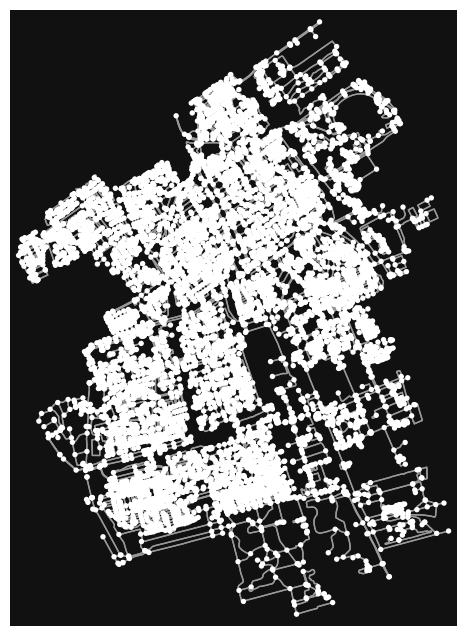

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [20]:
# visualize graph
ox.plot_graph(G)

In [21]:
# extract nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

In [22]:
# retrieve parks
tags = {'leisure': 'park', 'landuse': 'grass'}
parks = ox.geometries_from_place(place, tags)

In [23]:
# retrieve buildings
tags = {'building': True}
buildings = ox.geometries_from_place(place, tags)

In [24]:
# clean nodes
nodes = nodes[["geometry"]]
nodes = nodes.to_crs(crs_epsg)
nodes["x"] = nodes.geometry.x
nodes["y"] = nodes.geometry.y

In [25]:
# clean edges
edges = edges.reset_index()
edges = edges[["u", "v", "key", "length", "geometry"]]
edges = edges.to_crs(crs_epsg)

In [26]:
# clean parks
parks = parks.reset_index("element_type")
parks = parks[parks["element_type"] == "way"]
parks = parks[["geometry"]]
parks = parks.to_crs(crs_epsg)

In [27]:
# clean buildings
buildings = buildings.reset_index("element_type")
buildings = buildings[buildings["element_type"] == "way"]
buildings = buildings[["geometry"]]
buildings = buildings.to_crs(crs_epsg)

(81385.82533955466, 89447.30425001377, 440793.1380114883, 450266.83471500134)

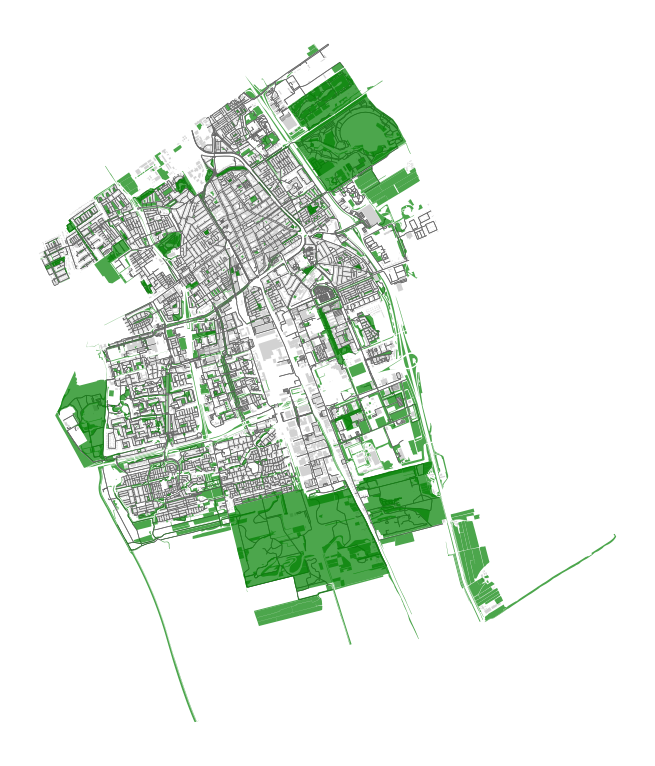

In [28]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot street edges
edges.plot(ax=ax, linewidth=0.5, edgecolor='dimgray', zorder=1)

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7, zorder=2)

# Plot parks
parks.plot(ax=ax, color='green', alpha=0.7, markersize=10, zorder=3)
plt.tight_layout()
plt.axis('off')

In [45]:
p_data = Path("./data/") /  "Delft"

In [44]:
nodes.to_file(p_data / "nodes.shp")
edges.to_file(p_data / "edges.shp")
parks.to_file(p_data / "parks.shp")
buildings.to_file(p_data / "buildings.shp")